In [21]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
data = pd.read_csv('amazon-reviews.csv')
data.head()
print(type(data))
df = pd.DataFrame(data, columns = ['reviewerID', 'asin', 'Title', 'reviewerName', 'helpful', 'reviewText', 'overall', 'summary', 'unixReviewTime', 'reviewTime'])

<class 'pandas.core.frame.DataFrame'>


In [23]:
df.head()

,reviewerID,asin,Title,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A15Q7ABIU9O9YZ,60554800,Red Tide,Larry Scantlebury,"[2,3]",This is my first GM Ford book and I will read ...,3,"Let's keep it real, not personal",1127606400,"09 25, 2005"
1,AUIJDXNYVTEA8,60554800,Red Tide,Les Stockton,"[0,2]",I liked the story. I thought the book added a...,4,I liked it,1361923200,"02 27, 2013"
2,A20N5GOON55TE9,60554800,Red Tide,lila,"[0,2]","As always, G.M. Ford does not disappoint. I st...",5,Good reading,1366761600,"04 24, 2013"
3,A1CT8ENDZSYTX3,60554800,Red Tide,Lisa B.,"[1,2]",I love Ford's Leo Waterman series and the firs...,3,Science Fiction or Mystery?,1122249600,"07 25, 2005"
4,A2SI6BNK5SWSMD,60554800,Red Tide,L. J. Roberts,"[2,2]",It was nice to see Corso working with the poli...,3,3.5 stars - Needed a better end.,1113004800,"04 9, 2005"


In [24]:
# create product graph (1 user availing diff products, make edge)
PG = nx.Graph()

for i in range(len(df)):
    for j in range(len(df)):
        if i!=j and df['reviewerID'][i]==df['reviewerID'][j]: 
            PG.add_edge(i,j)

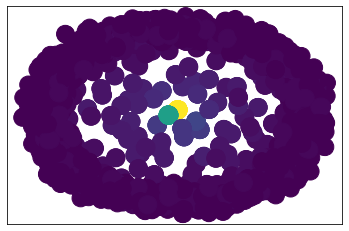

In [54]:
nx.draw_networkx(PG, with_labels = False, node_color = [200.0 * PG.degree(v) for v in PG])
plt.savefig("product_graph.jpg")

In [39]:
print(nx.info(PG))
print('Average Clustering {x}'.format(x = nx.average_clustering(PG)))

Name: 
Type: Graph
Number of nodes: 2742
Number of edges: 5424
Average degree:   3.9562
Average Clustering 0.5317286652078774


In [46]:
degree_list = sorted(PG.degree, key = lambda x: x[1], reverse=True)
print(degree_list[:10])
print(degree_list[-5:])

[(20, 60), (65, 60), (83, 60), (350, 60), (799, 60), (1410, 60), (1566, 60), (1745, 60), (1767, 60), (1784, 60)]
[(7369, 1), (7350, 1), (7378, 1), (7351, 1), (7379, 1)]


In [40]:
pr = nx.pagerank_numpy(PG)
print(pr)

{0: 0.00036469730124009773, 29: 0.0003646973012400715, 229: 0.0003646973012401167, 2962: 0.0003646973012400869, 6765: 0.0003646973012400869, 6789: 0.0003646973012400869, 2: 0.00036469730124000574, 30: 0.00036469730124000574, 4: 0.0003646973012400041, 31: 0.0003646973012400041, 1421: 0.0003646973012400041, 1819: 0.0003646973012400041, 2045: 0.0003646973012400041, 2106: 0.0003646973012400041, 2510: 0.0003646973012400041, 5: 0.0003646973012400039, 32: 0.0003646973012400039, 7: 0.0003646973012400034, 34: 0.0003646973012400034, 9: 0.00036469730124000303, 4448: 0.00036469730124000303, 16: 0.00036469730124000265, 712: 0.00036469730124000254, 17: 0.0003646973012400016, 1403: 0.0003646973012400016, 2984: 0.0003646973012400016, 4036: 0.0003646973012400016, 4610: 0.0003646973012400018, 20: 0.0003646973012399872, 65: 0.0003646973012399872, 83: 0.0003646973012399872, 350: 0.0003646973012399872, 799: 0.0003646973012399872, 1410: 0.0003646973012399872, 1566: 0.0003646973012399872, 1745: 0.00036469730

In [41]:
# finding min page rank nodes from graph
minval = min(pr.values())
res = [k for k, v in pr.items() if v==minval]
print(res)

[1952, 2198, 2355, 2513]


In [52]:
PG.degree(2513)

3